# Ejercicio análisi exploratorio parte 2

Utilizando los mimos datos sobre automoviles, responda a las siguientes preguntas 

1. [¿Existe alguna relacion entre el territorio y los caballos de potencia?](#1)
2. [¿Cuál es la correlación entre los caballos de potencia y las millas por galón?](#2)
3. [¿Si existiese una relación, ambas variables se mueven en la misma dirección?](#3)
4. [Compruebe la dirección de la relación con una visualización.](#4)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

autos = pd.read_csv(os.path.join("./csv/", "datos_automoviles.csv"))
autos.head()

,nombre,cilindros,peso,anio,territorio,aceleracion,mpg,caballos_potencia,desplazamiento
0,Chevrolet Chevelle Malibu,8,3504,1970,USA,12.0,18.0,130.0,307.0
1,Buick Skylark 320,8,3693,1970,USA,11.5,15.0,165.0,350.0
2,Plymouth Satellite,8,3436,1970,USA,11.0,18.0,150.0,318.0
3,Amc Rebel Sst,8,3433,1970,USA,12.0,16.0,150.0,304.0
4,Ford Torino,8,3449,1970,USA,10.5,17.0,140.0,302.0


## 1. ¿Existe alguna relacion entre el territorio y los caballos de potencia?

<a id="1"></a>

`territorio` es una variable categórica, por tanto, no es posible calcular la correlación con `caballos_potencia`. Pero, como `territorio` solo puede tomar 3 valores (Europe, Japan, USA), convertir cada valor en un número y crear una nueva columna que tenga el `territorio` almacenado como un número. Así, sí es posible calcular la correlación.

In [2]:
# Se crea la nueva columna
def territorio_a_num(territorio):
    serie_paises = ['Europe', 'USA', 'Japan']
    if territorio == serie_paises[0]:
        return 1
    elif territorio == serie_paises[1]:
        return 2
    elif territorio == serie_paises[2]:
        return 3
    
autos['territorio_num'] = autos['territorio'].map(territorio_a_num)

# La correlación entre las variables
autos.corr()['territorio_num']['caballos_potencia']

-0.030029215705601877

## 2. ¿Cuál es la correlación entre los caballos de potencia y las millas por galón?

<a id="2"></a>

In [3]:
autos_corr = autos.corr()
autos_corr

,cilindros,peso,anio,aceleracion,mpg,caballos_potencia,desplazamiento,territorio_num
cilindros,1.000000,0.895220,-0.360762,-0.522452,-0.775396,0.844158,0.951787,-0.027908
peso,0.895220,1.000000,-0.315389,-0.430086,-0.831741,0.866586,0.932475,-0.094713
anio,-0.360762,-0.315389,1.000000,0.301992,0.579267,-0.424419,-0.381714,0.143544
aceleracion,-0.522452,-0.430086,0.301992,1.000000,0.420289,-0.697124,-0.557984,-0.062585
mpg,-0.775396,-0.831741,0.579267,0.420289,1.000000,-0.778427,-0.804203,0.127164
caballos_potencia,0.844158,0.866586,-0.424419,-0.697124,-0.778427,1.000000,0.898326,-0.030029
desplazamiento,0.951787,0.932475,-0.381714,-0.557984,-0.804203,0.898326,1.000000,-0.040180
territorio_num,-0.027908,-0.094713,0.143544,-0.062585,0.127164,-0.030029,-0.040180,1.000000


In [4]:
autos_corr['caballos_potencia']['mpg']

-0.7784267838977761

## 3. ¿Si existiese una relación, ambas variables se mueven en la misma dirección?

<a id="3"></a>

Como se puede apreciar, la covarianza es negativa, lo cual indica que las variables se mueven en direcciones contrarias.

In [5]:
autos.cov()['mpg']['caballos_potencia']

-233.85792577900716

## 4. Compruebe la dirección de la relación con una visualización

<a id="4"></a>

Las gráficas de regresión, se observa que la pendiente de la curva es negativa, lo cual indica que las variables son inversamente proporcionales, lo cual significa que las variables se mueven en direcciones contrarias.

<AxesSubplot:title={'center':'scatter plot : mpg por caballos_potencia'}, xlabel='caballos_potencia', ylabel='mpg'>

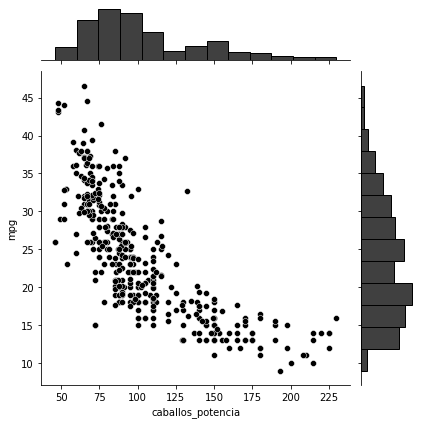

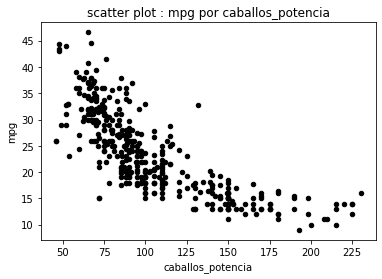

In [6]:
# Graficar utilizando seaborn
sns.jointplot(x='caballos_potencia', y='mpg', data=autos, color='#000000')

# Graficar utilizando pandas
autos.plot.scatter(x='caballos_potencia', y='mpg', color='#000000', title='scatter plot : mpg por caballos_potencia')